In [1]:
import math
import numpy as np
from PIL import Image
from IPython.display import display
from ipywidgets import interact

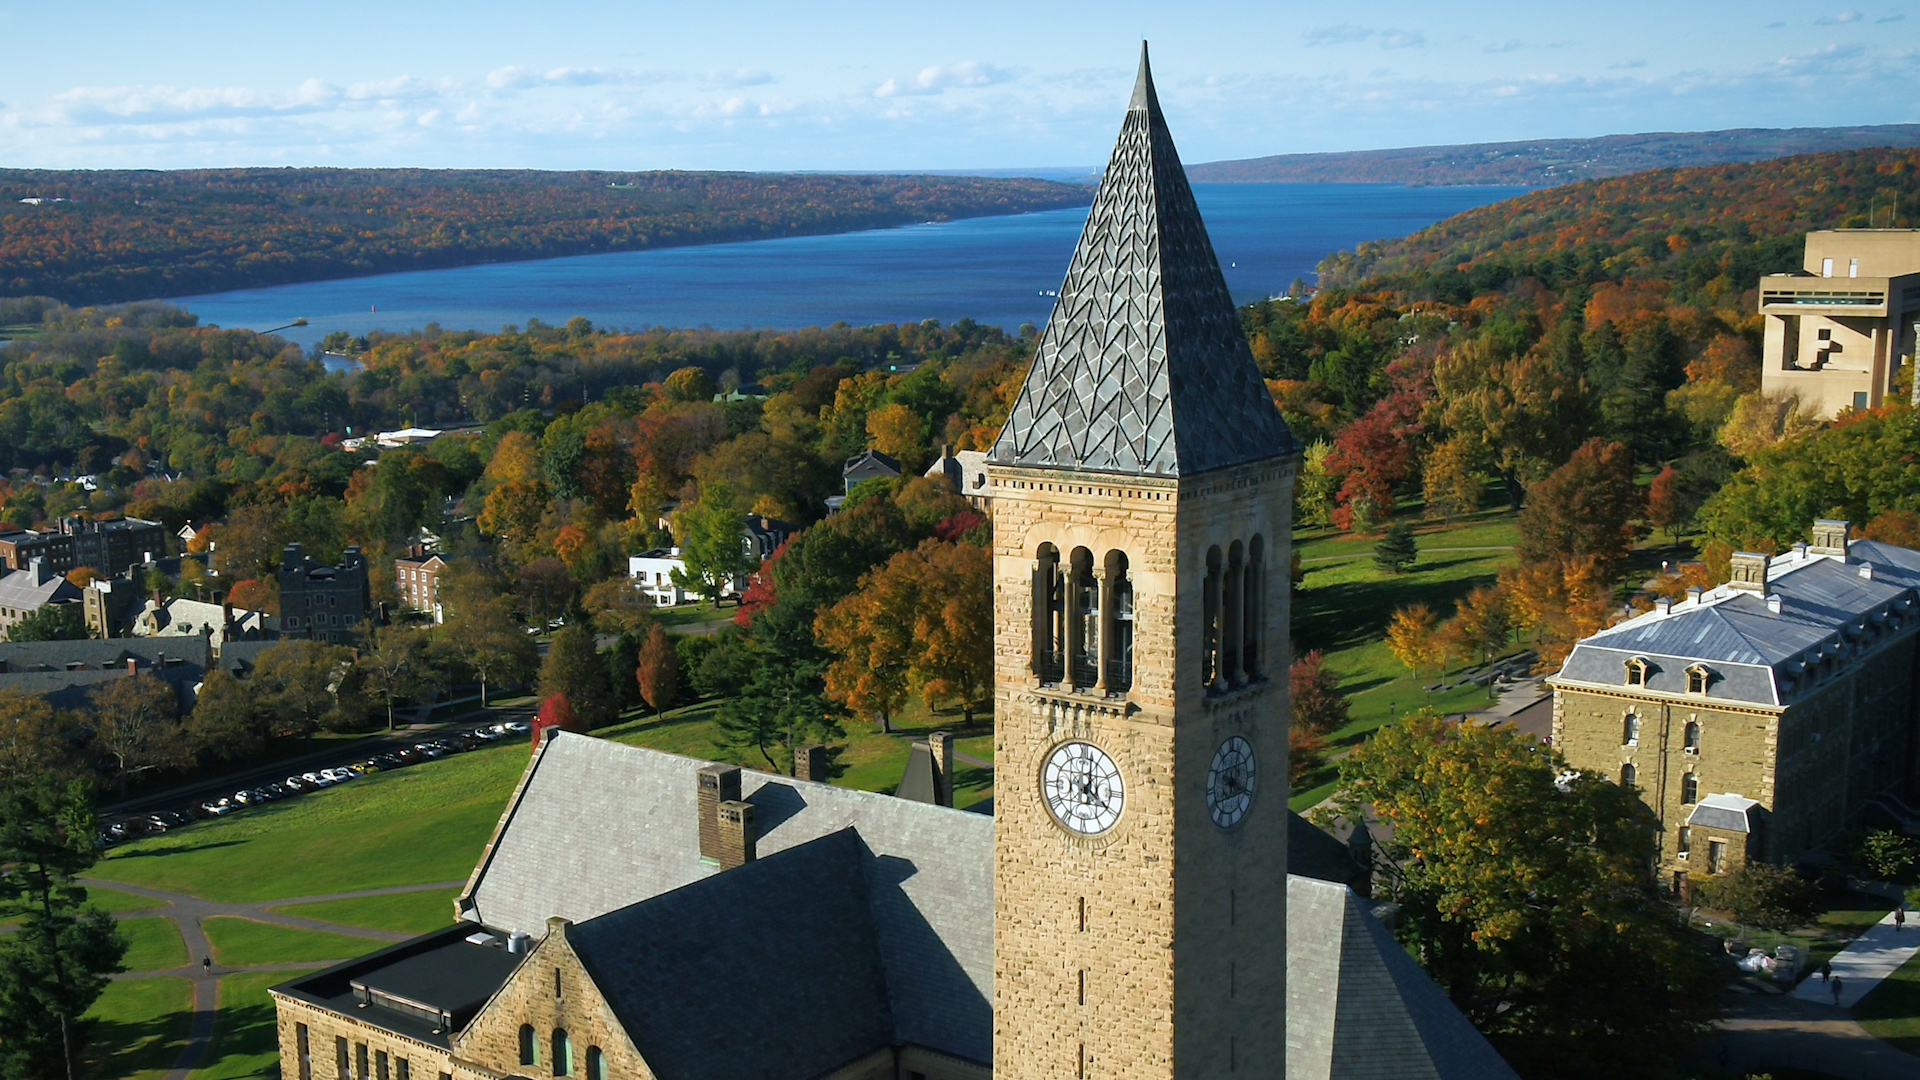

In [27]:
im1 = np.array(Image.open('./inputs/1.png'))
display(Image.fromarray(im1))

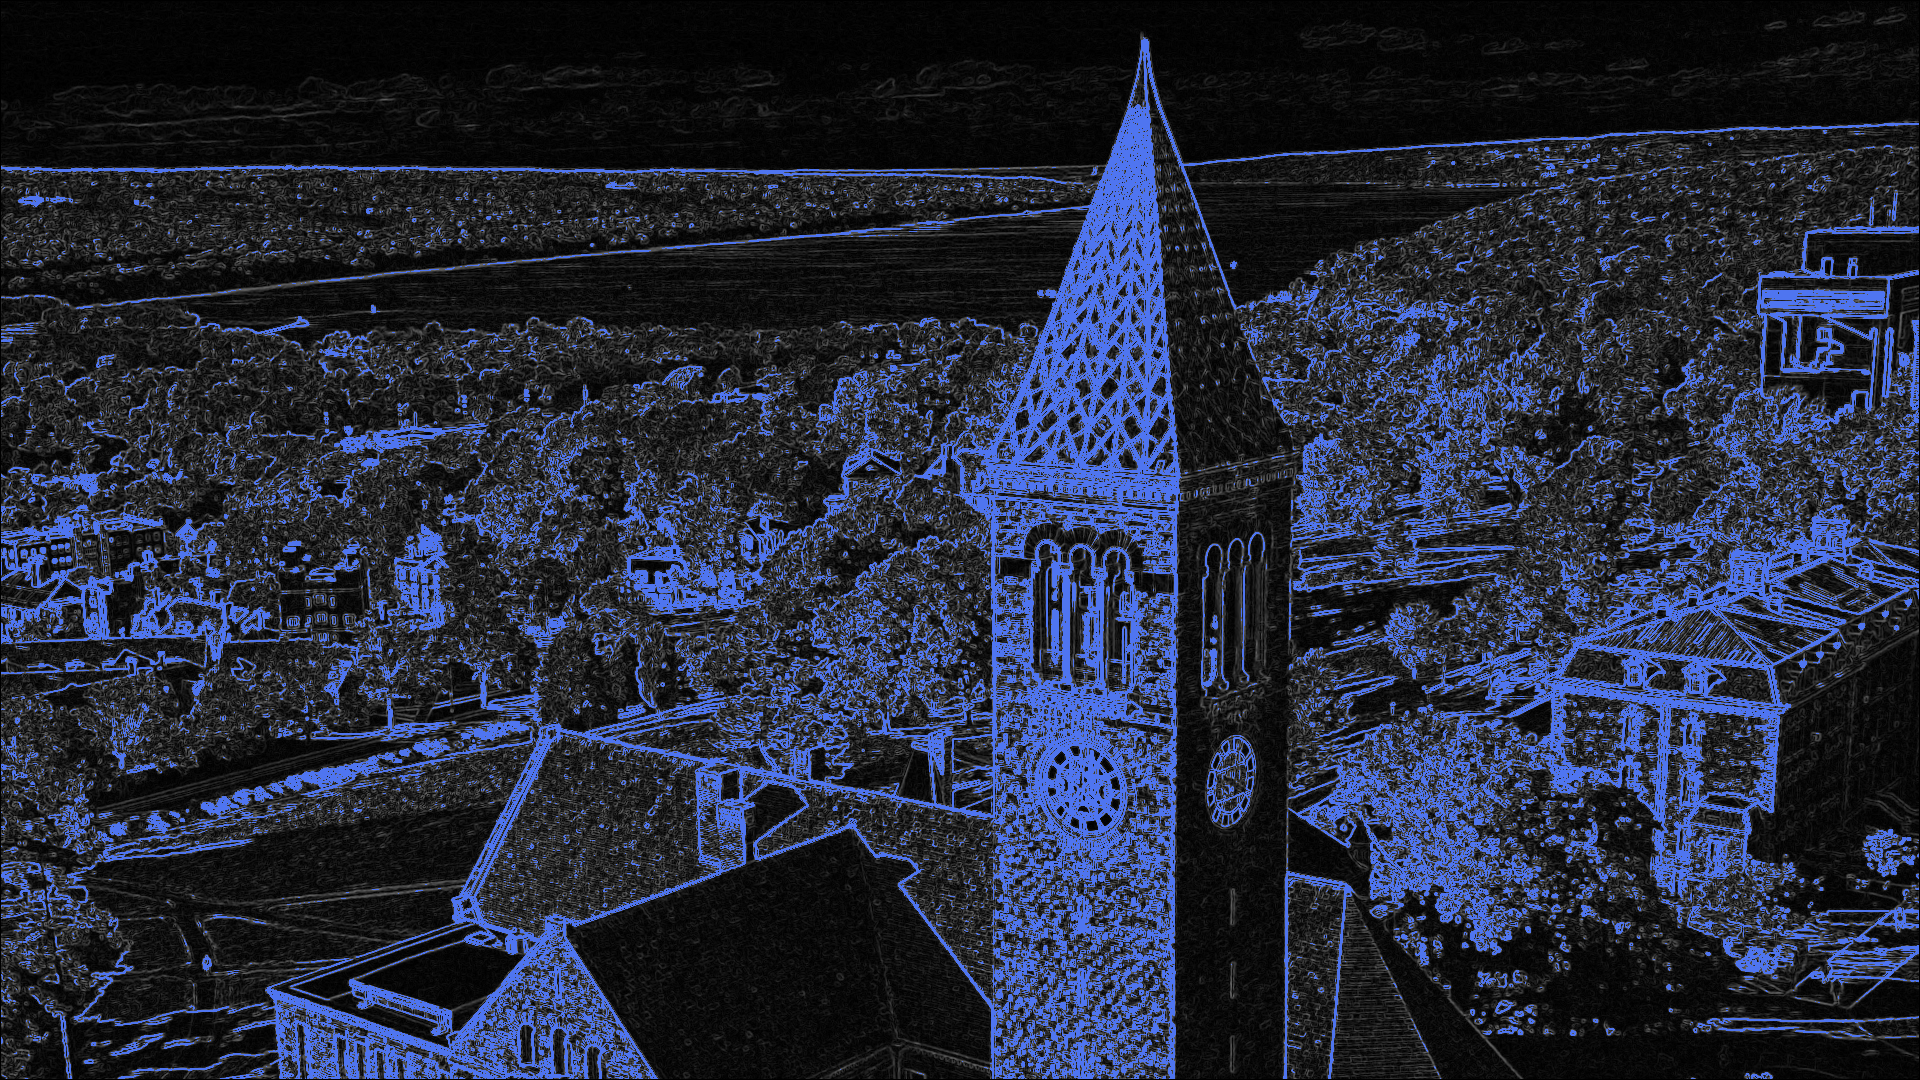

In [40]:
def convolve(I,threshold):
    # Calculate pixel intensity as the average of red, green and blue colors.
    intensity = np.asarray([[np.mean(I[x, y]) for y in range(I.shape[1])] for x in range(I.shape[0])]).astype(np.uint8)
    # Sobel kernels
    kernelx = [[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]]
    kernely = [[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]]
    
    output = np.zeros_like(I)

    # Compute convolution between intensity and kernels
    for x in range(1, I.shape[0] - 1):
        for y in range(1, I.shape[1] - 1):
            magx, magy = 0, 0
            for a in range(3):
                for b in range(3):
                    xn = x + a - 1
                    yn = y + b - 1
                    magx += intensity[xn][yn] * kernelx[a][b]
                    magy += intensity[xn][yn] * kernely[a][b]
            color = int(math.sqrt(magx**2 + magy**2))
            result =  [color,color,color]
            if color > threshold:
                result =[ 79, 117, 240]
            output[x][y] =result
    return output
threshold = 100
output = convolve(im1,threshold)
display(Image.fromarray(output))

#### In the creative part, our group implemented edge detection using sobel kernels and set obvious edges with a RGB value. This filter mimics the effect of a color pencil sketch.